In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import pandas as pd

In [2]:
df = pd.read_csv('data/wines.csv')

In [3]:
df.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
y = df['Class']

In [5]:
y.value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

In [6]:
y_cat = pd.get_dummies(y)

In [7]:
y_cat.head()

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [8]:
X = df.drop('Class', axis=1)

In [9]:
X.shape

(178, 13)

In [10]:
import seaborn as sns 

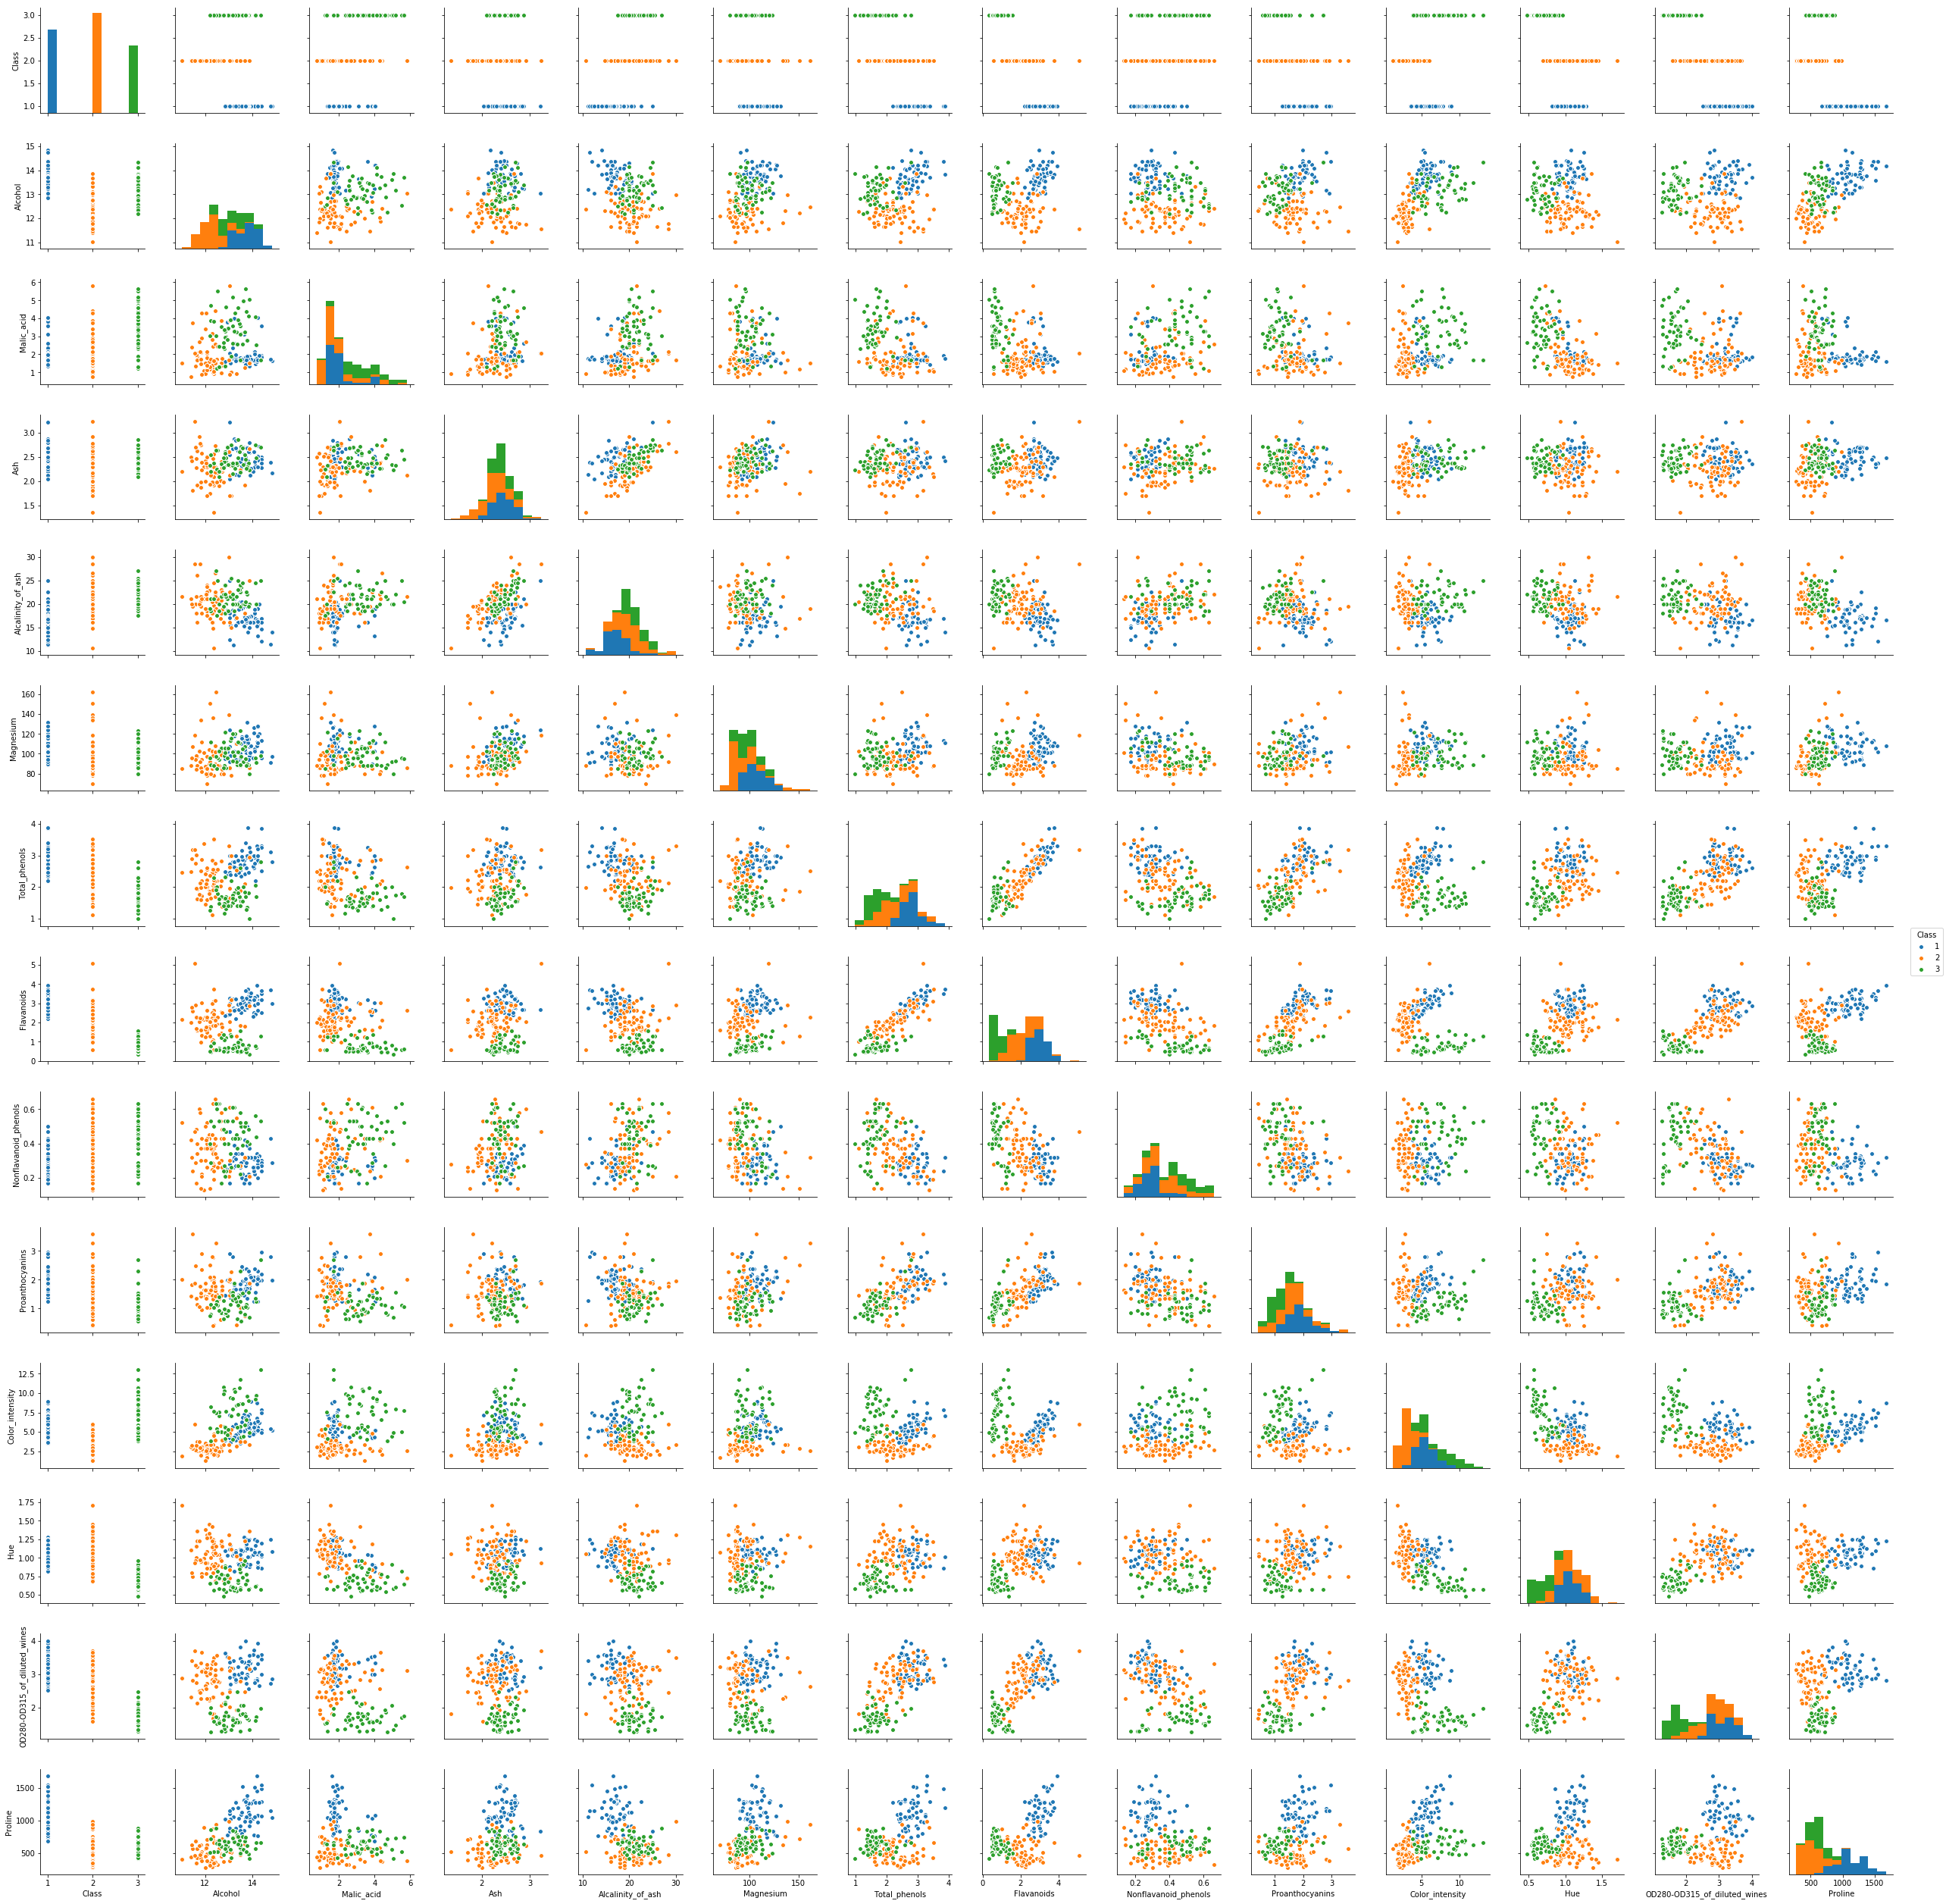

In [12]:
sns.pairplot(df, hue='Class')

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 

In [15]:
Xsc = sc.fit_transform(X)

In [17]:
from keras.models import Sequential 
from keras.layers import Dense 
from keras.optimizers import SGD, Adam, Adadelta, RMSprop 
import keras.backend as K

/home/qinritukou/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [18]:
K.clear_session()
model = Sequential()
model.add(Dense(5, input_shape=(13,),
               kernel_initializer='he_normal',
               activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(RMSprop(lr=0.1),
             'categorical_crossentropy',
             metrics=['accuracy'])
model.fit(Xsc, y_cat.values,
         batch_size=8, 
         epochs=10, 
         verbose=1,
         validation_split=0.2)

Train on 142 samples, validate on 36 samples
Epoch 1/10
142/142 [==============================] - 1s 4ms/step - loss: 0.3986 - acc: 0.8310 - val_loss: 0.6285 - val_acc: 1.0000
Epoch 2/10
142/142 [==============================] - 0s 311us/step - loss: 0.1164 - acc: 0.9718 - val_loss: 0.4951 - val_acc: 0.8611
Epoch 3/10
142/142 [==============================] - 0s 312us/step - loss: 0.1316 - acc: 0.9577 - val_loss: 0.3464 - val_acc: 0.9444
Epoch 4/10
142/142 [==============================] - 0s 302us/step - loss: 0.0696 - acc: 0.9718 - val_loss: 0.1161 - val_acc: 1.0000
Epoch 5/10
142/142 [==============================] - 0s 318us/step - loss: 0.0904 - acc: 0.9648 - val_loss: 0.0823 - val_acc: 1.0000
Epoch 6/10
142/142 [==============================] - 0s 347us/step - loss: 0.0393 - acc: 0.9930 - val_loss: 0.0649 - val_acc: 1.0000
Epoch 7/10
142/142 [==============================] - 0s 338us/step - loss: 0.0233 - acc: 0.9930 - val_loss: 0.0534 - val_acc: 1.0000
Epoch 8/10
142/142 

In [19]:
K.clear_session()
model = Sequential()
model.add(Dense(8, input_shape=(13,),
               kernel_initializer='he_normal', activation='tanh'))
model.add(Dense(5, kernel_initializer='he_normal', activation='tanh'))
model.add(Dense(2, kernel_initializer='he_normal', activation='tanh'))
model.add(Dense(3, activation='softmax'))

model.compile(RMSprop(lr=0.05),
             'categorical_crossentropy',
             metrics=['accuracy'])
model.fit(Xsc, y_cat.values,
         batch_size=16,
         epochs=20, 
         verbose=1)

Epoch 1/20
178/178 [==============================] - 0s 769us/step - loss: 0.7504 - acc: 0.5955
Epoch 2/20
178/178 [==============================] - 0s 198us/step - loss: 0.4637 - acc: 0.8034
Epoch 3/20
178/178 [==============================] - 0s 187us/step - loss: 0.2163 - acc: 0.9663
Epoch 4/20
178/178 [==============================] - 0s 186us/step - loss: 0.1517 - acc: 0.9775
Epoch 5/20
178/178 [==============================] - 0s 194us/step - loss: 0.0951 - acc: 0.9888
Epoch 6/20
178/178 [==============================] - 0s 177us/step - loss: 0.1086 - acc: 0.9775
Epoch 7/20
178/178 [==============================] - 0s 187us/step - loss: 0.0293 - acc: 1.0000
Epoch 8/20
178/178 [==============================] - 0s 188us/step - loss: 0.0158 - acc: 1.0000
Epoch 9/20
178/178 [==============================] - 0s 183us/step - loss: 0.0094 - acc: 1.0000
Epoch 10/20
178/178 [==============================] - 0s 183us/step - loss: 0.0056 - acc: 1.0000
Epoch 11/20
178/178 [========

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 12        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 9         
Total params: 178
Trainable params: 178
Non-trainable params: 0
_________________________________________________________________


In [22]:
inp = model.layers[0].input
out = model.layers[2].output 

In [23]:
features_function = K.function([inp], [out])

In [24]:
features = features_function([Xsc])[0]

In [25]:
features.shape

(178, 2)

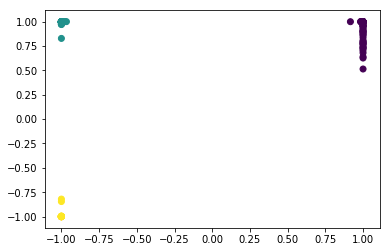

In [32]:
plt.scatter(features[:,0], features[:,1], c=y)